# Semana 10 - Optimización de parámetros
**Tópicos de Economía de la Empresa - E2TEE9**

Iniciaremos la clase resolviendo el ejercicio para la casa número 3, para determinar cuál es el mejor modelo hasta el momento para utilizarlo durante esta sesión. 

## Ejercicios para la casa N°3

Escalar la data utilizando min_max scaler y robust_scaler en vez de standard_scaler. 
1. Correr un clasificador de regresión logística usando ambos. 
2. Correr un clasificador KNN usando ambos
3. Correr un clasificador DT usando ambos. 
4. Correr un clasificador SVM usando ambos. 
5. Conclusiones respecto a este análisis. ¿Cuál es el mejor modelo hasta el momento y porqué?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('fintech.csv', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   score_1           824 non-null    object
 1   riesgo_score1     824 non-null    int64 
 2   score_2           824 non-null    object
 3   riesgo_score2     824 non-null    int64 
 4   interaccion_1     824 non-null    int64 
 5   interaccion_2     824 non-null    int64 
 6   monto             824 non-null    int64 
 7   mala_transaccion  824 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 51.6+ KB


In [4]:
df.head()

,score_1,riesgo_score1,score_2,riesgo_score2,interaccion_1,interaccion_2,monto,mala_transaccion
0,excelente,0,medio,1,0,1,79,0
1,excelente,0,excelente,0,0,0,99,0
2,excelente,0,medio,1,0,1,50,0
3,excelente,0,excelente,0,0,0,79,0
4,bueno,0,excelente,0,0,0,99,0


In [5]:
# Seleccionar solo las variables numéricas
df1 = df.iloc[:, list(range(3, 8)) + [1]]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   riesgo_score2     824 non-null    int64
 1   interaccion_1     824 non-null    int64
 2   interaccion_2     824 non-null    int64
 3   monto             824 non-null    int64
 4   mala_transaccion  824 non-null    int64
 5   riesgo_score1     824 non-null    int64
dtypes: int64(6)
memory usage: 38.8 KB


In [27]:
# Separamos a la variable dependiente de las independientes
X = df1[['riesgo_score1', 'riesgo_score2', 'interaccion_1', 'interaccion_2', 'monto']]
y = df1['mala_transaccion']

### Usando Min_Max Scaler

In [22]:
# Inicializar el escalador
scaler = MinMaxScaler()

# Ajustar (fit) y transformar los datos
scaled_data_mm = scaler.fit_transform(X)

#### Regresión Logística

In [9]:
#Instanciar
clf2 = LogisticRegression()

# Encajar
clf2.fit(scaled_data_mm, y)

# Predecir
y_pred_logmm = clf2.predict(scaled_data_mm)

# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_logmm) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_logmm))

Accuracy: 81.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       671
           1       0.47      0.05      0.09       153

    accuracy                           0.81       824
   macro avg       0.65      0.52      0.49       824
weighted avg       0.76      0.81      0.75       824



Tiene un recall muy malo de 0.05, peor que el modelo de regresión logística con Standard Scaler

#### KNN 

In [10]:
### KNN
## Haciendo fit al modelo con un número de 10 vecinos, como en la sesión anterior

knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_data_mm, y)

KNeighborsClassifier(n_neighbors=10)

In [11]:
# Obteniendo las predicciones del modelo 
y_pred_knn_mm = knn.predict(scaled_data_mm)

In [12]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_knn_mm) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_knn_mm))

Accuracy: 81.80%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       671
           1       0.67      0.04      0.07       153

    accuracy                           0.82       824
   macro avg       0.74      0.52      0.49       824
weighted avg       0.79      0.82      0.75       824



Este recall es aun peor que el de la regresión logística. 

#### Arbol de decisión

Aunque no es necesario escalar para el caso de árboles de decisión queremos comprobar que es neutro.

In [24]:
## Haciendo fit al modelo con una máxima profundidad de 8 nodos
dt_model = DecisionTreeClassifier(max_depth=8)
dt_model.fit(scaled_data_mm,y)
    
# Score on train and test
print(f"La precision del modelo de arbol de decision es {dt_model.score(scaled_data_mm, y)}")

La precision del modelo de arbol de decision es 0.8385922330097088


In [25]:
# Obteniendo las predicciones del modelo 
y_pred_dt_mm = dt_model.predict(scaled_data_mm)

In [26]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_dt_mm) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_dt_mm))

Accuracy: 83.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       671
           1       0.67      0.26      0.38       153

    accuracy                           0.84       824
   macro avg       0.76      0.62      0.64       824
weighted avg       0.82      0.84      0.81       824



Obtenemos los mismos resultados que en la clase pasada con data sin escalar. Veamos. 

In [28]:
## Haciendo fit al modelo con una máxima profundidad de 8 nodos
## Se puede optimizar el número de nodos de manera sistémica. En este caso, por el número de observaciones lo he hecho manual
dt_model = DecisionTreeClassifier(max_depth=8)
dt_model.fit(X,y)
    
# Score on train and test
print(f"La precision del modelo de arbol de decision es {dt_model.score(X, y)}")

La precision del modelo de arbol de decision es 0.8385922330097088


In [29]:
# Obteniendo las predicciones del modelo 
y_pred_dt = dt_model.predict(X)

In [31]:
## poniendo la predicción en el dataframe 1
df1.loc[:,'pred_prob_dt']=y_pred_dt

In [32]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_dt) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_dt))

Accuracy: 83.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       671
           1       0.67      0.26      0.38       153

    accuracy                           0.84       824
   macro avg       0.76      0.62      0.64       824
weighted avg       0.82      0.84      0.81       824



Grafiquemos el arbol decision

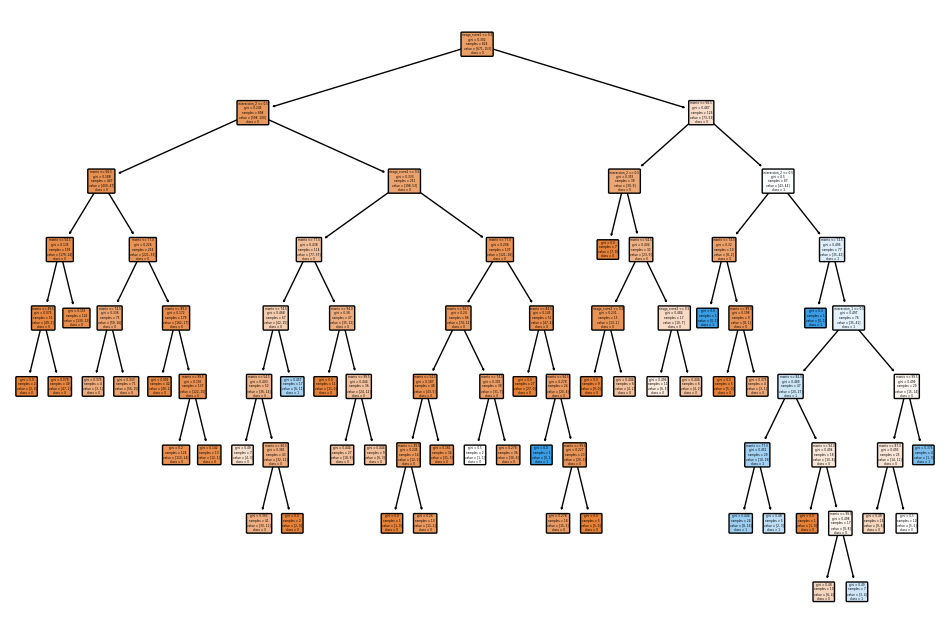

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the features and target
X = df1[['riesgo_score1', 'riesgo_score2', 'interaccion_1', 'interaccion_2', 'monto']]
y = df1['mala_transaccion']

# Initialize and fit the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, 
          feature_names=X.columns,  # Use X.columns for feature names
          class_names=[str(cls) for cls in y.unique()],  # Convert unique class labels to strings
          filled=True, 
          rounded=True)
plt.show()


#### SVM

In [13]:
# Inicializar el clasificador
svm = SVC()

# Encajar el modelo a la data
svm.fit(scaled_data_mm, y)

# Estimar las predicciones del modelo usando la data escalada
y_pred_svm_mm = svm.predict(scaled_data_mm)

In [26]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_svm_mm) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_svm_mm))

Accuracy: 82.28%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       671
           1       0.57      0.18      0.27       153

    accuracy                           0.82       824
   macro avg       0.71      0.57      0.58       824
weighted avg       0.79      0.82      0.78       824



El recall en este caso es peor que en el Standard_Scaler, 0.23. En general, el Min_Max Scaler para este dataset es inferior que el Standard Scaler

### Usando Robust Scaler

In [15]:
# Inicializar el escalador
scaler = RobustScaler()

# Ajustar (fit) y transformar los datos
scaled_data_rob = scaler.fit_transform(X)

####  Regresión Logística

In [16]:
#Instanciar
clf2 = LogisticRegression()

# Encajar
clf2.fit(scaled_data_rob, y)

# Predecir
y_pred_logrob = clf2.predict(scaled_data_rob)

# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_logrob) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_logrob))

Accuracy: 81.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       671
           1       0.47      0.05      0.09       153

    accuracy                           0.81       824
   macro avg       0.65      0.52      0.49       824
weighted avg       0.76      0.81      0.75       824



El recall es igual de malo que con Min_Max scaler e inferior a Standard Scaler, que era 0.10

#### KNN

In [30]:
## Haciendo fit al modelo con un número de 10 vecinos

knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_data_rob, y)

KNeighborsClassifier(n_neighbors=10)

In [31]:
# Obteniendo las predicciones del modelo 
y_pred_knn_rob = knn.predict(scaled_data_rob)

In [32]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_knn_rob) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_knn_rob))

Accuracy: 81.55%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       671
           1       0.52      0.09      0.16       153

    accuracy                           0.82       824
   macro avg       0.67      0.54      0.53       824
weighted avg       0.77      0.82      0.76       824



En el caso de KNN, obtenemos el mismo recall con RobustScaler que con StandardScaler, 0.09. No es motivo para hacer el cambio. 

#### Arbol de decisión 

In [33]:
## Haciendo fit al modelo con una máxima profundidad de 8 nodos

dt_model = DecisionTreeClassifier(max_depth=8)
dt_model.fit(scaled_data_rob,y)
    
# Score on train and test
print(f"La precision del modelo de arbol de decision es {dt_model.score(scaled_data_rob, y)}")

La precision del modelo de arbol de decision es 0.8385922330097088


Como vemos que es exactamente el mismo accuracy que en los casos anteriores, no es necesario seguir avanzando. Simplemente, no cambian los resultados asi se escale o no se escale la data. 

#### SVM

In [34]:
# Inicializar el clasificador
svm = SVC()

# Encajar el modelo a la data
svm.fit(scaled_data_rob, y)

# Estimar las predicciones del modelo usando la data escalada
y_pred_svm_rob = svm.predict(scaled_data_rob)

In [35]:
# Reporte
print(f"Accuracy: {accuracy_score(y, y_pred_svm_rob) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y, y_pred_svm_rob))

Accuracy: 82.52%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       671
           1       0.57      0.23      0.33       153

    accuracy                           0.83       824
   macro avg       0.71      0.60      0.61       824
weighted avg       0.79      0.83      0.79       824



En este caso, el recall de RobustScaler es igual que el de StandardScaler. 

### Conclusiones

- Para la algoritmo de árbol de decisión, no es necesario escalar la data, pues se obtiene el mismo resultado, no importa el método de escalamiento o si se escala o no. 
- El Min_Max Scaler es inferior al StandardScaler para este dataset. 
- El Robust Scaler es da los mimos resultados que el StandardScaler salvo por la regresión logística. 
- En conclusión, cambiar el método de escalamiento no altera los resultados para este dataset. 

##  El tradeoff entre varianza y sesgo

En el contexto del aprendizaje automático, el compromiso entre sesgo (bias) y varianza (variance) es un aspecto fundamental para entender el comportamiento de un modelo, especialmente en relación con su capacidad de generalizar a nuevos datos.

1. **Sesgo (Bias)**:
   - Refiere a los errores sistemáticos que introduce un modelo debido a supuestos incorrectos. Un modelo con alto sesgo tiene una visión simplista de los datos y no puede capturar las verdaderas relaciones subyacentes, lo que lleva a un error en la predicción. Esto es común en modelos demasiado simples o "subajustados" (underfitting).
   
2. **Varianza (Variance)**:
   - Refiere a la sensibilidad del modelo a pequeñas fluctuaciones en el conjunto de entrenamiento. Un modelo con alta varianza tiende a sobreajustarse (overfitting) a los datos de entrenamiento, capturando el "ruido" y las irregularidades en lugar de la relación subyacente real. Esto puede llevar a un rendimiento pobre cuando se expone a nuevos datos.
   
![Alternative text for the image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*_7OPgojau8hkiPUiHoGK_w.png)

3. **El punto medio**:
   - Idealmente, queremos un modelo con bajo sesgo y baja varianza, pero en la práctica, a medida que reducimos el sesgo de un modelo (haciéndolo más complejo), generalmente aumentamos su varianza y viceversa. Esta relación inversa crea un "punto medio" entre sesgo y varianza.
   
   - Visualmente, este punto medio a menudo se representa como una curva en forma de U, donde el eje vertical es el error total y el eje horizontal representa la complejidad del modelo. A medida que aumenta la complejidad del modelo, el sesgo disminuye pero la varianza aumenta. El objetivo es encontrar el punto óptimo en esta curva donde el error total (que es la suma del sesgo, la varianza y un error irreducible) sea el mínimo.
   
![tradeoff](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)
   
Cuando entrenamos modelos de aprendizaje automático, es crucial ser consciente de este punto medio. La elección de la complejidad del modelo, así como las técnicas de regularización, son herramientas que podemos usar para equilibrar el sesgo y la varianza y obtener un modelo que generalice bien a nuevos datos.

Hasta el momento, **no hemos entrenado el modelo de Difficult Pay**, solo hemos aplicado los algoritmos de machine learning, pero sin un método sistemático que nos pueda ayudar a que el próximo conjunto de data que llegue de la parte comercial tega sustancialmente menos transacciones malas. En esta sesión aplicaremos el método con el cual podemos dejar el modelo entrenado para su uso comercial. 

## ¿Cómo entrenar un modelo?

En el contexto del aprendizaje automático supervisado, se utiliza la técnica de dividir los datos en conjuntos de entrenamiento y prueba para **asegurar que el modelo pueda generalizar bien a datos no vistos previamente.**

El **conjunto de entrenamiento** es utilizado para entrenar o "enseñar" al modelo. Aquí, el modelo aprende las relaciones o patrones entre las características (o variables independientes) y las etiquetas (o variable dependiente) de los datos.

El **conjunto de prueba**, por otro lado, se utiliza para evaluar cómo el modelo se desempeña con datos que no ha visto durante su entrenamiento. Es una simulación de cómo el modelo podría actuar en situaciones reales, con datos nuevos.

La necesidad de separar los datos en estos dos conjuntos radica en la prevención del **sobreajuste** (o "overfitting" en inglés). El sobreajuste ocurre cuando un modelo aprende las características del conjunto de entrenamiento tan a fondo, incluyendo el ruido o las anomalías, que pierde la capacidad de generalizar a nuevos datos. Un modelo sobreajustado tiene un desempeño excelente en el conjunto de entrenamiento, pero un rendimiento pobre en el conjunto de prueba y, por extensión, en datos no vistos.

Al tener un conjunto de prueba separado, podemos obtener una medida más realista de cómo el modelo se comportará en el mundo real, y asegurarnos de que no esté simplemente "memorizando" los datos de entrenamiento. Por lo tanto, esta división ayuda a construir modelos más robustos y confiables.

Hemos estado usando la data de manera monolítica. Si fuéramos a aplicar la separación de conjunto de entrenamiento y test, tenemos muy pocas observaciones. ¿Cómo solucionar esto? `Bootstrapping`. Muestreemos con reemplazo, de manera aleatoria, un dataset que sea el 25% del total de 824 observaciones (n=206). Al hacer el muestreo de manera aleatoria, el mismo punto puede estar repetido, lo cual para nuestros fines es bueno. Se puede ingresar un número mayor de observaciones, porque, a su vez, el train_test split es aleatorio. Ojo, esto no es lo mismo que upsampling, que revisitaremos luego durante la sesión. 

### Creando un test set

In [39]:
# Separamos a la variable dependiente de las independientes
X = df1[['riesgo_score1', 'riesgo_score2', 'interaccion_1', 'interaccion_2', 'monto']]
y = df1['mala_transaccion']

### Train - test split

Vamos a partir la data en tuplas. El train set se queda con 80% de la data y el test set con 20% de la data. Utilizaremos el algoritmo de arbol de decisión. 

In [40]:
from sklearn.model_selection import train_test_split
# Partir la data en tuples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Vamos por el arbol de decisión, que hasta ahora ha sido el clasificador más potente
dt_model = DecisionTreeClassifier(max_depth=8)
dt_model.fit(X_train,y_train)
    
#Sacando el score
train_prediction = dt_model.predict(X_train)
test_prediction = dt_model.predict(X_test)
accuracy_train = accuracy_score(train_prediction, y_train)
accuracy_test = accuracy_score(test_prediction, y_test)

print(f"El accuracy del train set: {accuracy_train:.3f}")
print(f"El accuracy del test set: {accuracy_test:.3f}")

El accuracy del train set: 0.838
El accuracy del test set: 0.800


In [41]:
# Reporte de métricas respecto al test set
print(f"Accuracy: {accuracy_score(y_test, test_prediction) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 80.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.89       129
           1       0.71      0.14      0.23        36

    accuracy                           0.80       165
   macro avg       0.76      0.56      0.56       165
weighted avg       0.78      0.80      0.74       165



El recall es peor. El principal problema es que hemos entrenado con muy poca data. Es decir, estamos teniendo aun menos señal para el entrenamiento que la que teniamos cuando usamos los 824 datos como un monolito. 

## Afinamiento de parámetros

Hasta el momento, estamos confiando en el supuesto de que la mejor profunidad del arbol de decisión es 8. Sin embargo, hemos introducido dos nuevas variables al dataset desde que realicé este cálculo. Deberíamos tener un método para determinar qué se puede afinar en el algoritmo y cómo lo podemos hacer de manera sistemática. Lo primero es entender qué se puede optimizar. 

In [42]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Podemos optimizar todos esto parámetros. Los más frecuentes de optimización son `max_depth`, `max_features` y `max_leaf_nodes`. Por ahora, concentremonos en max_depth, que es el que mayor impacto tiene sobre el overfitting. Vamos a comparar el modelo de test contra el de train

In [43]:
# Listas de scores con cambios en max_depth
test_scores = []
train_scores = []

max_depth_list = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 

for d in max_depth_list :
    dt_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    
    # using the data from the second split
    dt_mod.fit(X_train,y_train)
    
    train_scores.append(dt_mod.score(X_train,y_train))
    test_scores.append(dt_mod.score(X_test,y_test))

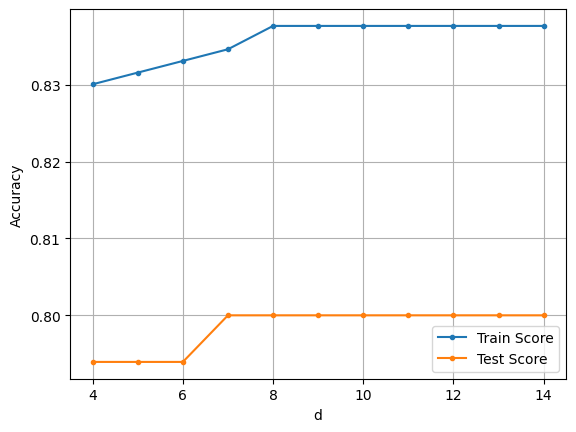

In [44]:
#plotting results
plt.figure()
plt.plot(max_depth_list,train_scores, label='Train Score',marker='.')
plt.plot(max_depth_list,test_scores, label='Test Score',marker='.')
plt.xlabel('d')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

En el código de arriba, estamos utilizando directamente el método `score()` del modelo de árbol de decisión (`dt_mod`) para calcular los puntajes de precisión tanto para los conjuntos de datos de entrenamiento como de prueba. Este método internamente realiza predicciones y las compara con las etiquetas reales para calcular la precisión.El algoritmo sigue entrenando hasta hacer overfitting. Parece que 8 es el número óptimo, según el test set.  

## Validación cruzada para encontrar los mejores parámetros

La validación cruzada, denominada `cross-validation` en inglés, es una técnica utilizada para evaluar la capacidad de generalización de un modelo. La idea es utilizar diferentes subconjuntos de los datos para entrenar y probar el modelo múltiples veces, para luego promediar los resultados y obtener una estimación más robusta del rendimiento del modelo.

La validación cruzada más utilizada es la **k-fold**:

1. **División del conjunto de datos:** Se divide el conjunto de datos total en $ k $ subconjuntos (o "folds") de aproximadamente el mismo tamaño.

2. **Entrenamiento y Evaluación repetida:** El proceso de entrenamiento y evaluación se repite $ k $ veces. En cada iteración, $k-1$ subconjuntos (folds) se utilizan para entrenar el modelo y el subconjunto restante se utiliza para evaluar el modelo. Esto asegura que cada subconjunto se utilice exactamente una vez como conjunto de prueba.

3. **Promedio de los resultados:** Después de realizar el entrenamiento y la evaluación $ k $ veces, se promedian los resultados para obtener una única métrica de rendimiento.

![cross_validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

4. **Ventajas:**
   - Reduce la varianza que podría resultar al dividir los datos en un único conjunto de entrenamiento y prueba. Esto puede ayudar a evitar que el modelo se sobreajuste a una particular división de los datos.
   - Proporciona una estimación más robusta del rendimiento real del modelo.

5. **Desventajas:**
   - Requiere entrenar el modelo $ k $ veces, lo que puede ser computacionalmente costoso para conjuntos de datos grandes o modelos complejos.

6. **Variantes:**
   - **Validación cruzada estratificada:** Se utiliza cuando se tiene un desequilibrio en las clases del conjunto de datos. Garantiza que cada fold tenga aproximadamente la misma proporción de observaciones de cada clase.

**¿Cómo se utiliza?**

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
dt_mod = DecisionTreeClassifier(max_depth=8, random_state=1)

scores = cross_val_score(dt_mod, X_train, y_train, cv = 5)
print(scores)

[0.79545455 0.79545455 0.81060606 0.78030303 0.80916031]


Para usar la validación cruzada en la selección de modelos y la optimización de hiperparámetros, necesitamos evaluar todos los modelos resultantes de cambiar los valores de hiperparámetros que estamos considerando en cada uno de los pliegues (en nuestro caso, max_depth. La elección del hiperparámetro se reduce entonces al valor con el puntaje de validación cruzada más alto.

In [47]:
# Listas de scores con cambios en max_depth
cross_validation_scores = []
max_depth_list = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 

for d in max_depth_list :
    dt_mod = DecisionTreeClassifier(max_depth=d, random_state=1)
    
    # Calculando los cv scores
    cv_score = np.mean(cross_val_score(dt_mod, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

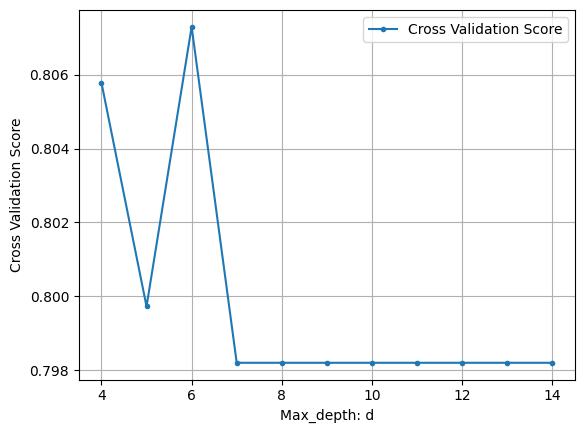

In [48]:
#Graficando los resultados
plt.figure()
plt.plot(max_depth_list, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Max_depth: d')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

En este caso, 6 nos darían el resutlado óptimo y no 8. 

In [49]:
# En caso que los parámetros (en otros algoritmos) sean más complicados de leer
best_value_idx = np.argmax(cross_validation_scores)

In [50]:
# el mejor valor de la lista es 
max_depth_list[best_value_idx]

6

El resultado óptimo es 6. 

In [51]:
## Ahora si corremos nuestro modelo con 6 como max depth
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Vamos por el arbol de decisión, que hasta ahora ha sido el clasificador más potente

dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train,y_train)
    
#Sacando el score
train_prediction = dt_model.predict(X_train)
test_prediction = dt_model.predict(X_test)
accuracy_train = accuracy_score(train_prediction, y_train)
accuracy_test = accuracy_score(test_prediction, y_test)

print(f"El accuracy del train set: {accuracy_train:.3f}")
print(f"El accuracy del test set: {accuracy_test:.3f}")

El accuracy del train set: 0.833
El accuracy del test set: 0.794


Este resultado es el que nos garantiza que no estemos haciendo overfitting. Hay una pérdida de 4 puntos en el accuracy entre el train y el test set. 

El modelo de 6 de `max_depth`es "más puro" en el sentido técncio. Pero, tenemos muy pocos datos. Lo que está haciendo el algoritmo es armar 5 subconjuntos train-test de igual numero de observaciones. El train tiene 659 observaciones. O sea que cada fold separa 20% (132) para test y entrena con 527.

In [53]:
# Reporte
print(f"Accuracy: {accuracy_score(y_train, train_prediction) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_train, train_prediction))

Accuracy: 83.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       542
           1       0.55      0.31      0.40       117

    accuracy                           0.83       659
   macro avg       0.71      0.63      0.65       659
weighted avg       0.81      0.83      0.81       659



Tenemos un recall de 0.31, el mejor hasta ahora de los modelos individuales. 

In [54]:
# Reporte
print(f"Accuracy: {accuracy_score(y_test, test_prediction) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 79.39%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       129
           1       0.57      0.22      0.32        36

    accuracy                           0.79       165
   macro avg       0.69      0.59      0.60       165
weighted avg       0.76      0.79      0.76       165



El recall del test set es pobre aun con 22%. Debemos hacer algunas cosas más para mejorarlo. 

## Revisitando las clases desbalanceadas

En la clase anterior balanceamos el panel de datos de manera que tuviésemos el mismo número de 1s y 0s. A diferencia del tomado de muestra que hicimos en el numeral anterior, para que la nueva muestra fuese el test set, en este caso ampliaremos el panel nuevo para que tenga las clases balanceadas y de ahi dividiremos en train y test set. 

In [55]:
# Separamos a la variable dependiente de las independientes
X = df1[['riesgo_score1', 'riesgo_score2', 'interaccion_1', 'interaccion_2', 'monto']]
y = df1['mala_transaccion']

In [56]:
# Identifica los verdaderos positivos en los datos de entrenamiento
verdaderos_positivos = X[y == 1]

In [57]:
verdaderos_positivos

,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto
118,0,0,0,0,75
120,0,0,0,0,75
123,0,1,0,1,75
137,1,0,0,1,59
138,0,0,0,0,99
...,...,...,...,...,...
734,0,0,0,0,75
735,1,0,0,1,75
736,1,0,0,1,75
737,1,0,0,1,75


In [59]:
# Sobremuestrea los verdaderos positivos utilizando muestreo aleatorio
verdaderos_positivos_sobremuestreados = verdaderos_positivos.sample(
    n=len(X[y == 0]),  # Coincide con el número de verdaderos negativos
    replace=True,  # Permite el muestreo con reemplazo
    random_state=1  # Establece una semilla aleatoria para reproducibilidad
)

In [60]:
verdaderos_positivos_sobremuestreados

,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto
410,0,0,0,1,59
726,1,0,0,1,99
658,0,0,0,1,75
723,1,0,0,1,99
719,0,1,0,1,99
...,...,...,...,...,...
272,0,0,0,0,74
650,1,0,0,0,74
572,1,0,0,1,100
585,0,0,0,1,99


In [61]:
# Combina los verdaderos positivos sobremuestreados con los verdaderos negativos
X_sobremuestreado = pd.concat([X[y == 0], verdaderos_positivos_sobremuestreados])
y_sobremuestreado = pd.Series([0] * len(X[y== 0]) + [1] * len(verdaderos_positivos_sobremuestreados))

In [62]:
X_sobremuestreado 

,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto
0,0,1,0,1,79
1,0,0,0,0,99
2,0,1,0,1,50
3,0,0,0,0,79
4,0,0,0,0,99
...,...,...,...,...,...
272,0,0,0,0,74
650,1,0,0,0,74
572,1,0,0,1,100
585,0,0,0,1,99


In [63]:
### Quiero reindexar el df para que sea correlativo 
X_sobremuestreado.reset_index(inplace=True)

In [64]:
## descarto la nueva columna index, creada automaticamente
X_sobremuestreado.drop('index', axis=1, inplace=True)

In [65]:
X_sobremuestreado

,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto
0,0,1,0,1,79
1,0,0,0,0,99
2,0,1,0,1,50
3,0,0,0,0,79
4,0,0,0,0,99
...,...,...,...,...,...
1337,0,0,0,0,74
1338,1,0,0,0,74
1339,1,0,0,1,100
1340,0,0,0,1,99


El df queda limpio, con 1341 observaciones. 

In [80]:
y_sobremuestreado

0       0
1       0
2       0
3       0
4       0
       ..
1337    1
1338    1
1339    1
1340    1
1341    1
Length: 1342, dtype: int64

El vector y_sobremuestreado tiene igual numero de 1s que 0s. 

In [66]:
y_sobremuestreado.sum() 

671

In [70]:
## Ahora si corremos nuestro modelo de nuevo de arbol de decisión con 6 como max depth, un test size de 20%
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_sobremuestreado, y_sobremuestreado, test_size=0.20, random_state=1)

## Vamos por el arbol de decisión, que hasta ahora ha sido el clasificador más potente, con max depth 6
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train_1,y_train_1)
    
#Sacando el score
train_prediction = dt_model.predict(X_train_1)
test_prediction = dt_model.predict(X_test_1)
accuracy_train = accuracy_score(train_prediction, y_train_1)
accuracy_test = accuracy_score(test_prediction, y_test_1)

print(f"El accuracy del train set: {accuracy_train:.3f}")
print(f"El accuracy del test set: {accuracy_test:.3f}")

El accuracy del train set: 0.743
El accuracy del test set: 0.755


In [71]:
# Reporte
print(f"Accuracy: {accuracy_score(y_test_1, test_prediction) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test_1, test_prediction))

Accuracy: 75.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       139
           1       0.74      0.76      0.75       130

    accuracy                           0.75       269
   macro avg       0.75      0.75      0.75       269
weighted avg       0.76      0.75      0.75       269



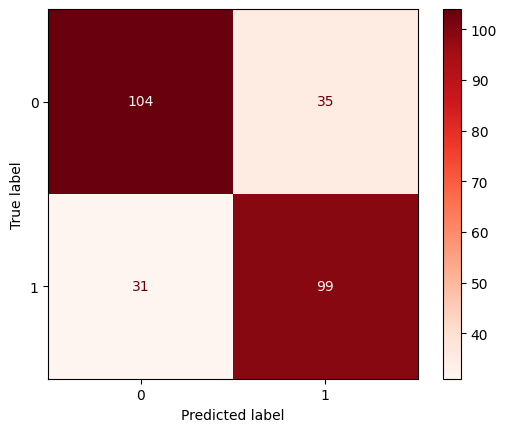

In [72]:
# generando la matriz de confusion 
cf_matrix = confusion_matrix(y_test_1,test_prediction )

# presentando la matriz
ConfusionMatrixDisplay(cf_matrix).plot(cmap='Reds')
plt.show()

Este modelo tiene un recall mucho mejor, aunque menor accuracy. ¿Es rentable el negocio en este punto?

- Hay 104 buenas transacciones, 
- El modelo detecto 99 malas transacciones antes que ocurran, 
- Dejo pasar 35 buenas transacciones
- Dejó pasar 31 malas transacciones. 

Si cada transaccion en promedio es USD 75, por ejemplo, el ingreso se genera con 100 transacciones por USD 75  por 5% de comisiones. 375 dólares de ingreso. 
Pero pierde el 100% de 31 transacciones, $2325 en total. Es decir, ha perdido casi 2000 con este modelo, aplicado sobre la nueva data. 
Necesitamos más data, más variables y quizás, en los márgnenes, con una optimización de parámetros. Veamos cuánto ayuda esto último. 

## Optimización de hiperparámetros

La manera más exhaustiva de afinar un model es usar un método de simulación de parámetros. Los dos más usados son GridSearch y RandomSearch.

![gridsearch](https://miro.medium.com/v2/resize:fit:828/format:webp/1*Xq9OvMKXhrF3W2RBJCWW7w.png)

**GridSearch (Búsqueda por Rejilla)**
GridSearch, o Búsqueda por Rejilla, es una técnica de optimización para modelos de aprendizaje automático. Consiste en especificar un conjunto de posibles valores para cada hiperparámetro del modelo. Luego, GridSearch crea una 'rejilla' de todas las posibles combinaciones de estos valores de hiperparámetros y entrena un modelo para cada combinación. Al final, selecciona la combinación de hiperparámetros que produce el mejor rendimiento, de acuerdo a alguna métrica predefinida (por ejemplo, precisión, error cuadrático medio, etc.).

**Pros:**
1. Es exhaustivo, pues prueba todas las combinaciones posibles.
2. Es determinístico, dado que para los mismos datos e hiperparámetros siempre se obtendrá el mismo resultado.

**Contras:**
1. Puede ser computacionalmente costoso, especialmente si hay muchos hiperparámetros o si los rangos de valores son amplios.

**RandomSearch (Búsqueda Aleatoria)**
RandomSearch, o Búsqueda Aleatoria, es otra técnica para optimizar hiperparámetros. A diferencia de GridSearch, no prueba todas las combinaciones posibles. En su lugar, selecciona combinaciones al azar de hiperparámetros dentro de los rangos especificados y entrena un modelo para cada una. Se define previamente un número fijo de iteraciones o combinaciones a probar.

**Pros:**
1. Es más rápido que GridSearch, especialmente si el número de combinaciones posibles es muy alto.
2. Puede explorar un espacio más amplio de hiperparámetros en menos tiempo.
3. En muchos casos, se ha encontrado que RandomSearch encuentra combinaciones de hiperparámetros tan buenas o incluso mejores que GridSearch en menos iteraciones.

**Contras:**
1. No es exhaustivo, por lo que podría no encontrar la combinación óptima.
2. Es no determinístico, ya que las combinaciones se eligen al azar.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [74]:
# Revisar qué parámetros podemos optimizar
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [75]:
## No hemos tocado max_features. Tenemos 5. 
param_grid = {
'max_depth':    [5, 6, 7, 8, 9, 10],
'max_features': [3,4,5],
'random_state': [1]}

dt_model=DecisionTreeClassifier()

In [76]:
# Gridsearch & fit
gs = GridSearchCV(dt_model, param_grid, scoring='accuracy', n_jobs=-1,verbose=1, cv=5)
gs.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5], 'random_state': [1]},
             scoring='accuracy', verbose=1)

In [77]:
# best parameters
gs.best_params_

{'max_depth': 5, 'max_features': 4, 'random_state': 1}

In [78]:
# best score
gs.best_score_

0.7353097152792871

Cuando estableces `n_jobs=-1`, instruyes al algoritmo para que utilice todos los núcleos de CPU disponibles en tu máquina. Esto puede acelerar significativamente el proceso de búsqueda por rejilla, especialmente cuando hay un gran número de combinaciones de hiperparámetros para probar, ya que las tareas (entrenar y evaluar un modelo con un conjunto específico de hiperparámetros) pueden ejecutarse de manera concurrente en diferentes núcleos.

In [79]:
gs.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': -1,
 'param_grid': {'max_depth': [5, 6, 7, 8, 9, 10],
  'max_features': [3, 4, 5],
  'random_state': [1]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 1}

Cuando usas GridSearchCV con la configuración predeterminada, realiza una validación cruzada k-fold en los datos de entrenamiento proporcionados. Para cada combinación de hiperparámetros, los datos de entrenamiento se dividen en k subconjuntos (o "folds"). El modelo se entrena en k-1 de estos folds y se valida en el fold restante. Este proceso se repite k veces de modo que cada fold sirve como conjunto de validación exactamente una vez. El atributo best_score_ proporciona la media de las puntuaciones de "accuracy" de validación cruzada para la combinación de hiperparámetros con el mejor rendimiento.

In [80]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=1, max_features=4)
dt_model.fit(X_train_1,y_train_1)
    
#Sacando el score
train_prediction = dt_model.predict(X_train_1)
test_prediction = dt_model.predict(X_test_1)
accuracy_train = accuracy_score(train_prediction, y_train_1)
accuracy_test = accuracy_score(test_prediction, y_test_1)

print(f"El accuracy del train set: {accuracy_train:.3f}")
print(f"El accuracy del test set: {accuracy_test:.3f}")

El accuracy del train set: 0.740
El accuracy del test set: 0.755


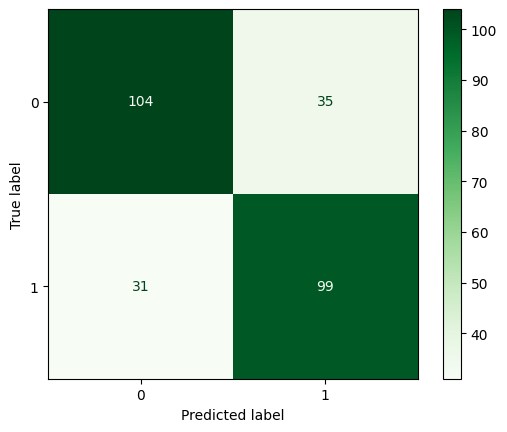

In [81]:
# generando la matriz de confusion 
cf_matrix = confusion_matrix(y_test_1,test_prediction )

# presentando la matriz
ConfusionMatrixDisplay(cf_matrix).plot(cmap='Greens')
plt.show()

Vemos que esta validación no ha cambiado los resultados. ¿Cuál es el problema? Tenemos muy pocas variables explicativas, entonces la variación de `max_features` y `max_depth` no tiene mucho impacto. Vamos a ver cómo cambia esto durante la práctica calificada. Al momento, no hemos encontrado un modelo que nos sirva adecuadamente.  

## Añadiendo más variables al dataset

### El dataset original

In [82]:
df=pd.read_csv('fintech.csv', sep=";")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   score_1           824 non-null    object
 1   riesgo_score1     824 non-null    int64 
 2   score_2           824 non-null    object
 3   riesgo_score2     824 non-null    int64 
 4   interaccion_1     824 non-null    int64 
 5   interaccion_2     824 non-null    int64 
 6   monto             824 non-null    int64 
 7   mala_transaccion  824 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 51.6+ KB


In [84]:
df['score_1'].unique()

array(['excelente', 'bueno', 'medio', 'nd', 'malo'], dtype=object)

In [85]:
df['score_2'].unique()

array(['medio', 'excelente', 'malo', 'bueno', 'nodata'], dtype=object)

Un primer arreglo es cambiar 'nodata' por 'nd' para que los scores categóricos sean iguales. 

In [86]:
df.loc[df['score_2'] == 'nodata', 'score_2'] = 'nd'

In [87]:
df['score_2'].unique()

array(['medio', 'excelente', 'malo', 'bueno', 'nd'], dtype=object)

In [88]:
pd.crosstab(df.score_1, df.score_2)

score_2,bueno,excelente,malo,medio,nd
score_1,,,,,
bueno,106,77,19,20,1
excelente,227,147,24,74,3
malo,17,2,1,4,0
medio,31,17,7,6,0
nd,14,2,9,15,1


Las combinaciones de excelente y bueno constituyen la gran mayoría de observaciones. 

In [89]:
(106+77+227+147)/824

0.6759708737864077

In [90]:
#Mirando el score 1 más de cerca
pd.crosstab(df.score_1, df.mala_transaccion)

mala_transaccion,0,1
score_1,,
bueno,165,58
excelente,433,42
malo,13,11
medio,38,23
nd,22,19


Vemos que hay malas transacciones aún en excelente y bueno, pero  en las otras tres categorias, efectivamente la mayoría (o cerca de la mayoría son malas). 

In [91]:
#Mirando el score 2 más de cerca
pd.crosstab(df.score_2, df.mala_transaccion)

mala_transaccion,0,1
score_2,,
bueno,304,91
excelente,218,27
malo,42,18
medio,102,17
nd,5,0


Algo parecido, se ve con el score 2. Entonces, pensemos en una manera de generar un score cuantitativo para usarlo dentro del modelo. Asignar los siguientes scores:  
- excelente: 1
- bueno: 2
- medio: 3
- malo:4 
- nd: 5

Crearemos un término de interacción `interaccion_suma` que sume ambos scores. 

In [92]:
#Creando el puntaje 1 
df.loc[df['score_1'] == 'excelente', 'puntaje_1'] = 1
df.loc[df['score_1'] == 'bueno', 'puntaje_1'] = 2
df.loc[df['score_1'] == 'medio', 'puntaje_1'] = 3
df.loc[df['score_1'] == 'malo', 'puntaje_1'] = 4
df.loc[df['score_1'] == 'nd', 'puntaje_1'] = 5

In [93]:
#Creando el puntaje 2 
df.loc[df['score_2'] == 'excelente', 'puntaje_2'] = 1
df.loc[df['score_2'] == 'bueno', 'puntaje_2'] = 2
df.loc[df['score_2'] == 'medio', 'puntaje_2'] = 3
df.loc[df['score_2'] == 'malo', 'puntaje_2'] = 4
df.loc[df['score_2'] == 'nd', 'puntaje_2'] = 5

In [94]:
df['interaccion_suma']=df['puntaje_1'] + df['puntaje_2']

In [95]:
df['interaccion_suma'].unique()

array([ 4.,  2.,  3.,  5.,  7.,  6.,  8.,  9., 10.])

In [96]:
## Veamos si tienen algo que ver con las malas transacciones
pd.crosstab(df.interaccion_suma, df.mala_transaccion)

mala_transaccion,0,1
interaccion_suma,,
2.0,137,10
3.0,266,38
4.0,155,42
5.0,55,22
6.0,30,17
7.0,13,13
8.0,10,6
9.0,4,5
10.0,1,0


El porcentaje de transacciones malas aumenta con el numero de interaccion suma. 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score_1           824 non-null    object 
 1   riesgo_score1     824 non-null    int64  
 2   score_2           824 non-null    object 
 3   riesgo_score2     824 non-null    int64  
 4   interaccion_1     824 non-null    int64  
 5   interaccion_2     824 non-null    int64  
 6   monto             824 non-null    int64  
 7   mala_transaccion  824 non-null    int64  
 8   puntaje_1         824 non-null    float64
 9   puntaje_2         824 non-null    float64
 10  interaccion_suma  824 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 70.9+ KB


In [98]:
df.head()

,score_1,riesgo_score1,score_2,riesgo_score2,interaccion_1,interaccion_2,monto,mala_transaccion,puntaje_1,puntaje_2,interaccion_suma
0,excelente,0,medio,1,0,1,79,0,1.0,3.0,4.0
1,excelente,0,excelente,0,0,0,99,0,1.0,1.0,2.0
2,excelente,0,medio,1,0,1,50,0,1.0,3.0,4.0
3,excelente,0,excelente,0,0,0,79,0,1.0,1.0,2.0
4,bueno,0,excelente,0,0,0,99,0,2.0,1.0,3.0


## Práctica calificada 2

Luego de algunas transformaciones externas, incluyo algunas variables más explicativas. Utilizar data_cal2024 para desarrollar la práctica calificada. 

In [99]:
df1=pd.read_csv('data_cal2024.csv', sep=";")

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   score_1                  824 non-null    object
 1   score_2                  824 non-null    object
 2   riesgo_score1            824 non-null    int64 
 3   riesgo_score2            824 non-null    int64 
 4   interaccion_1            824 non-null    int64 
 5   interaccion_2            824 non-null    int64 
 6   monto                    824 non-null    int64 
 7   mala_transaccion         824 non-null    int64 
 8   puntaje_1                824 non-null    int64 
 9   puntaje_2                824 non-null    int64 
 10  interaccion_suma         824 non-null    int64 
 11  estado                   824 non-null    object
 12  cod_postal               824 non-null    int64 
 13  ingreso_promedio_estado  824 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 90.2

In [101]:
df1.head()

,score_1,score_2,riesgo_score1,riesgo_score2,interaccion_1,interaccion_2,monto,mala_transaccion,puntaje_1,puntaje_2,interaccion_suma,estado,cod_postal,ingreso_promedio_estado
0,nd,nd,1,0,0,1,50,0,5,5,10,NC,28525,53687
1,nd,malo,1,1,1,1,59,1,5,4,9,IL,60473,61456
2,nd,malo,1,1,1,1,75,0,5,4,9,SC,29642,52348
3,nd,malo,1,1,1,1,75,0,5,4,9,CA,90220,65895
4,nd,malo,1,1,1,1,75,1,5,4,9,NC,28052,53687


Hay varias variables que no podemos usar. Hay tres variables cualitativas y `cod_postal` no tiene un sentido estadístico para el modelo. Quizás si estuvierámos en un modelo de clustering sería útil, pero el codigo postal de California (90000), estadísitcamente no dice nada respecto al de NY (10000). Tomen las previsiones para no usar estas variables. Este es el dataset que utilizaremos para la práctica calificada. 

**El caso**

El CEO de Dificult Pay ha contratado a UdeP Analytics para que lo asistan en afinar el modelo de negocio de la empresa. Su equipo de analytics interno ha llegado hasta crear las distintas variables de interaccion de los scores de riesgo, pero les falta más experiencia con machine learning para extraer conclusiones accionables para el negocio. 

Difficult Pay recibe 5% del valor de la transacción como comisión, por cada transacción exitosa (verdaderos negativos 0,0), pero pierde el 100% de las transacciones fraudulentas (verdaderos positivos 1,1). Sin embargo, su sistema de riesgo actual es adhoc. El departamento de analistas de Difficult Pay realiza algunos chequeos aleatorios con los bancos para aprobar las transacciones (pero no necesariamente esta decisión está basada en alguno de los scores crediticios con los que cuentan). Además, no siempre registran la data de manera uniforme (por ejemplo, el criterio por el cual se negó la transacción). Esta metodología no permite tener una claridad sobre las cuatro clasificaciones de la matriz de confusión, a priori. Lo que sí sabemos a ciencia cierta es que han habido 153 malas transacciones dentro del dataset de 824 transacciones, las cuales no fueron detectadas por su proceso actual. Como hemos visto en clase, mediante machine learning es posible tener una predicción sobre estos números y completar la matriz de confusión. 

Difficult Pay ha comprado nuestra idea de instalar un modelo crediticio basado en machine learning. Nos ha pedido plantear el mejor modelo utilizando lo aprendido hasta ahora (logit, knn, svm y árboles de decisión) para maximizar el ingreso (o minimizar la pérdida) del negocio. Con el dataset data_cal2024.csv, responder las siguientes preguntas. 

**Introducción** 4 puntos. 

1. Sin utilizar modelo de machine learning aún, cuánto dinero ha ganado o perdido Difficult Pay en estas 824 transacciones. (2 puntos)
2. ¿A cuánto tendría que subir Difficult Pay la comisión por transacción para que el negocio llegase al punto de equilibrio de ingresos (1 punto)? 
3. Alternativamente, a la tarifa del 5%, cuántas transacciones malas podría haber aceptado Difficult Pay para llegar a al punto de equilibrio. Usar el valor promedio por transaccion para aproximarla. (1 punto)

**Desarrollo de Machine Learning** 14 puntos. 

Hemos visto en clase que el principal problema del dataset es que tiene un desbalance de clases (hay muy pocos 1s). Entonces, cualquier mejora que se quiera hacer sobre el modelo usando afinamiento de hiperparámetros no ha sido fructífera. Una posibilidad de mejora es hacer upsampling. Adicionalmente, en este dataset existen dos variables explicativas adicionales al visto en clase `interaccion_suma` y `ingreso_promedio_estado`. Veamos si al utilizar estas el accuracy, y particularmente el recall de la clase 1 mejoran. Tengan en consideración que las variables `puntaje_1` y `puntaje_2` no son necesarias, pues `interaccion_suma`, es la suma de ambas.  

4. Hacer upsampling al dataset para tener igual número de transacciones buenas como malas. 2 puntos.  
5. Armar un nuevo dataframe que incluya tanto las variables independientes como la dependiente. Debe tener 1342 filas. llamarla df1. 1 punto. 
6. Hacer un train_test split para el nuevo df1 y usar un modelo de arbol de decision de profundidad 10 para predecir la clase 1. Generar la matriz de confusión y el reporte de clasificación. Comentar sobre el nivel de accuracy del modelo y recall de la clase 1 para el test set. 5 puntos. 
7. Hacer validación cruzada de 5 folds para el ejemplo anterior utilizando un max depth desde 6 a 16. ¿Cuál es la profundidad óptima del arbol? 2 puntos
8. Correr el modelo nuevamente con esta profundidad óptima. ¿Como resultan el accuracy y recall en el test set? 2 puntos. 
9. Probar la optimizacion con GridSearch. Correr el modelo con los parámetros óptimos encontrados. ¿Como resultan el accuracy y recall en el test set? 2 puntos. 

**Conclusiones** 2 puntos

Supongamos que el test set del ejercicio anterior (debería tener 269 observaciones) era un nuevo set de data que trajo el equipo de analytics para analizar luego de dos semanas de operación utilizando el modelo. 

10. ¿Cuánto dinero hizo la compañia según este dataset? ¿Está funcionando el nuevo modelo o no? ¿A cuánto tendrían que subir la comisión? 2 puntos. 